In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load training set

In [ ]:
df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv', header=0, index_col=0)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


1 index column; 11 independent variables; 1 target variable.

Loan_ID : Unique Loan ID (index column)

Gender : Male/ Female

Married : Applicant married (Y/N)

Dependents : Number of dependents 

Education : Applicant Education (Graduate/ Not Graduate)

Self_Employed : Self employed (Y/N)

ApplicantIncome : Applicant income ($)

CoapplicantIncome : Coapplicant income ($)

LoanAmount : Loan amount in thousands of dollars (1000$)

Loan_Amount_Term : Term of loan in months (months)

Credit_History : credit history meets guidelines yes or no (1-Good or 0-Bad)

Property_Area : Urban (thành thị) / Semi Urban (bán thành thị) / Rural (nông thôn)

Loan_Status : Loan approved (Y/N) this is the target variable (Yes-Good, No-Bad)

Modify LoanAmount from 1000 dollar per unit to 1 dollar per unit

In [ ]:
df['LoanAmount'] = df['LoanAmount'] * 1000


Value_counts

In [ ]:
for i in df.columns:
  print(df[i].value_counts(normalize=True))

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64
Yes    0.651391
No     0.348609
Name: Married, dtype: float64
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64
No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64
2500    0.014658
4583    0.009772
6000    0.009772
2600    0.009772
3333    0.008143
          ...   
3244    0.001629
4408    0.001629
3917    0.001629
3992    0.001629
7583    0.001629
Name: ApplicantIncome, Length: 505, dtype: float64
0.0       0.444625
2500.0    0.008143
2083.0    0.008143
1666.0    0.008143
2250.0    0.004886
            ...   
2791.0    0.001629
1010.0    0.001629
1695.0    0.001629
2598.0    0.001629
240.0     0.001629
Name: CoapplicantIncome, Length: 287, dtype: float64
120000.0    0.033784
110000.0    0.028716
100000.0    0.025338
160000.0    0.020270
187000.0    0.020270
              ...   
24

Convert 'Credit_History' from numerical to categorical

In [ ]:
df['Credit_History'] = np.where(df['Credit_History']==0, 'Bad', 'Good')


Descriptive statistics

In [ ]:
# For numerical features

numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
print('Number of numerical features: ', len(numerical_features))

df[numerical_features].describe()

Number of numerical features:  4


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146412.162162,342.00000
std,6109.041673,2926.248369,85587.325236,65.12041
min,150.000000,0.000000,9000.000000,12.00000
25%,2877.500000,0.000000,100000.000000,360.00000
50%,3812.500000,1188.500000,128000.000000,360.00000
75%,5795.000000,2297.250000,168000.000000,360.00000
max,81000.000000,41667.000000,700000.000000,480.00000


In [ ]:
# For categorical features

categorical_features = [x for x in df.columns if (x not in numerical_features and x != 'Loan_Status')]
print('Number of categorical features: ', len(categorical_features))

df[categorical_features].describe()

Number of categorical features:  7


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,2,3
top,Male,Yes,0,Graduate,No,Good,Semiurban
freq,489,398,345,480,500,525,233


Encode string to binaries:

Gender (0-Male; 1-Female)

Married (0-No; 1-Yes)

Education (0-Not Graduate; 1 - Graduate)

Dependents (0; 1; 2; 3 (3+))

Self-Employed (0-No; 1 -Yes)

Property_Area (0-Urban; 1-Semiurban; 2-Rural)

Loan_status (0-No; 1-Yes)

Cách 1

In [ ]:
df['Gender'] = np.where(df['Gender']=='Male', '0', '1')


Cách 2

In [ ]:
#train_set['Gender'] = ['0' if x == 'Male' else '1' for x in train_set['Gender']]
#test_set['Gender'] = ['0' if x == 'Male' else '1' for x in test_set['Gender']]

Continue

In [ ]:
df['Married'] = np.where(df['Married']=='No', '0', '1')


In [ ]:
df['Education'] = np.where(df['Education']=='Not Graduate', '0', '1')


In [ ]:
df['Dependents'] = df['Dependents'].replace('3+', '3')


In [ ]:
df['Self_Employed'] = np.where(df['Self_Employed']=='No', '0', '1')


In [ ]:
df['Credit_History'] = np.where(df['Credit_History']=='Good', '1', '0')


In [ ]:
df['Loan_Status'] = np.where(df['Loan_Status']=='Y', '1', '0')


In [ ]:
def modify_value(row):
    if row['Property_Area'] == 'Urban':
      return '0'
    elif row['Property_Area'] == 'Semiurban':
      return '1'
    else:
      return '2'
df = df.assign(Property_Area=df.apply(modify_value, axis=1))


In [ ]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,0,0,0,1,0,5849,0.0,NaN,360.0,1,0,1
LP001003,0,1,1,1,0,4583,1508.0,128000.0,360.0,1,2,0
LP001005,0,1,0,1,1,3000,0.0,66000.0,360.0,1,0,1
LP001006,0,1,0,0,0,2583,2358.0,120000.0,360.0,1,0,1
LP001008,0,0,0,1,0,6000,0.0,141000.0,360.0,1,0,1
LP001011,0,1,2,1,1,5417,4196.0,267000.0,360.0,1,0,1
LP001013,0,1,0,0,0,2333,1516.0,95000.0,360.0,1,0,1
LP001014,0,1,3,1,0,3036,2504.0,158000.0,360.0,0,1,0
LP001018,0,1,2,1,0,4006,1526.0,168000.0,360.0,1,0,1


Correlation matrix

In [ ]:
from copy import deepcopy

df_corr = deepcopy(df).iloc[:, :-1]

s = df_corr.select_dtypes(include='object').columns
df_corr[s] = df_corr[s].astype("float")

In [ ]:
corr = df_corr.corr()

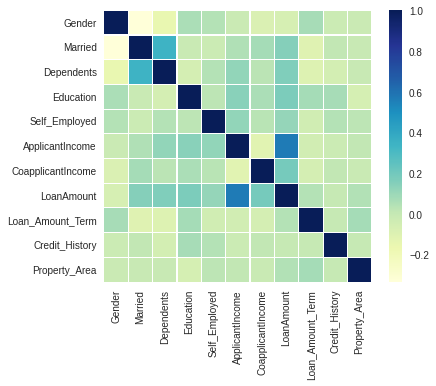

In [ ]:
f, ax = plt.subplots(figsize =(6, 5))
sns.heatmap(corr, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

Change types for categorical_col, numerical_col

In [ ]:
for col in categorical_features:
    df[col] = df[col].astype('object')
for col in numerical_features:
    df[col] = df[col].astype('float')


Descriptive statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     614 non-null    object 
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), object(8)
memory usage: 62.4+ KB


For categorical columns

In [ ]:
df[categorical_features].describe()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
count,614,614,599,614,614,614,614
unique,2,2,4,2,2,2,3
top,0,1,0,1,0,1,1
freq,489,401,345,480,500,525,233


For numerical columns

In [ ]:
df[numerical_features].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146412.162162,342.00000
std,6109.041673,2926.248369,85587.325236,65.12041
min,150.000000,0.000000,9000.000000,12.00000
25%,2877.500000,0.000000,100000.000000,360.00000
50%,3812.500000,1188.500000,128000.000000,360.00000
75%,5795.000000,2297.250000,168000.000000,360.00000
max,81000.000000,41667.000000,700000.000000,480.00000


Check missing values

In [ ]:
df.isna().sum().sort_values(ascending=False)

LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Fill missing values: if there are repaid inability, we fill with the negative values.

In [ ]:
df.loc[df['Loan_Status'] == '0','LoanAmount'] = df.loc[df['Loan_Status'] == '0','LoanAmount'].fillna(value=df['LoanAmount'].max())
df.loc[df['Loan_Status'] == '0','Loan_Amount_Term'] = df.loc[df['Loan_Status'] == '0','Loan_Amount_Term'].fillna(value=df['Loan_Amount_Term'].min())
df.loc[df['Loan_Status'] == '0','Dependents'] = df.loc[df['Loan_Status'] == '0','Dependents'].fillna(value='3')


And reverse

In [ ]:
df.loc[df['Loan_Status'] == '1','LoanAmount'] = df.loc[df['Loan_Status'] == '1','LoanAmount'].fillna(value=df['LoanAmount'].min())
df.loc[df['Loan_Status'] == '1','Loan_Amount_Term'] = df.loc[df['Loan_Status'] == '1','Loan_Amount_Term'].fillna(value=df['Loan_Amount_Term'].max())
df.loc[df['Loan_Status'] == '1','Dependents'] = df.loc[df['Loan_Status'] == '1','Dependents'].fillna(value='0')


In [ ]:
df.isna().sum().sum()

0

Check outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

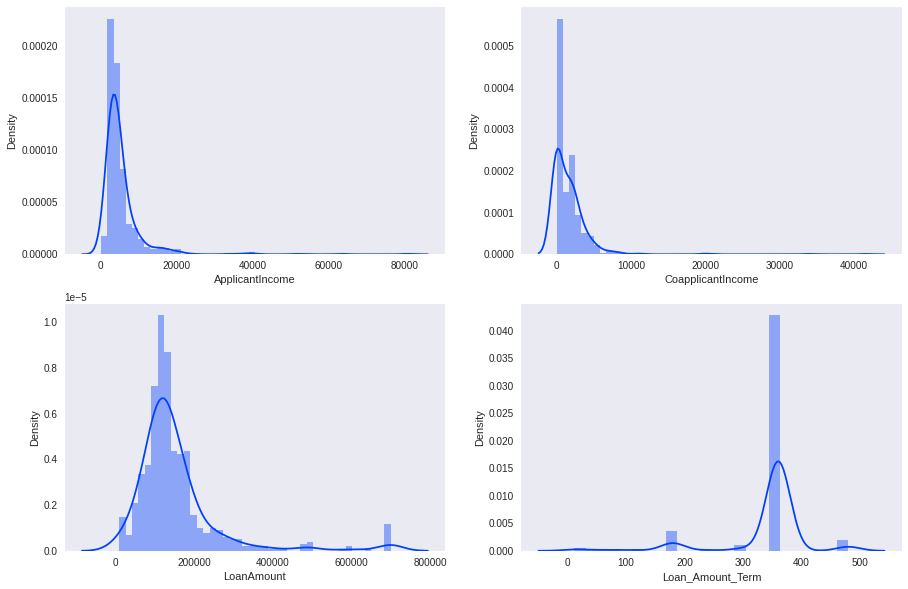

In [ ]:
plt.figure(figsize=(15, 10))
def density(list_variables):
  x=1
  for i in list_variables:
    plt.subplot(2,2,x)
    sns.distplot(df[i])
    x+=1
  plt.savefig('visualize_value_distribution_before_fix.png')

density(numerical_features)

Visualizing variables based on target

No handles with labels found to put in legend.


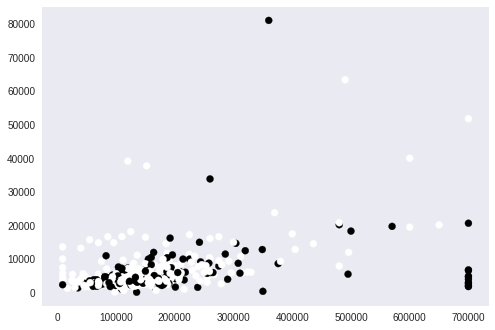

In [ ]:
# For 2 numerical variables with target
plt.style.use("seaborn-dark")
plt.scatter(df['LoanAmount'], df['ApplicantIncome'], c=df['Loan_Status'])
plt.legend()
plt.show()

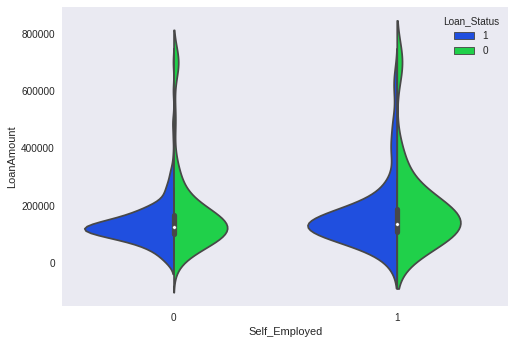

In [ ]:
# For 1 numerical variable and 1 categorical variable with target

ax = sns.violinplot(x='Self_Employed', y='LoanAmount', hue='Loan_Status', split=True, data=df)


Logistic regression

In [ ]:
# Create function for AUC, ROC that will be applied in the following models

from sklearn.metrics import roc_curve, auc
def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

Train-test split

In [ ]:
target = ['Loan_Status']
features = list(set(list(df.columns)) - set(target))

In [ ]:
print('Target: ', target)
print('Features: ', features)

Target:  ['Loan_Status']
Features:  ['Self_Employed', 'Loan_Amount_Term', 'ApplicantIncome', 'Dependents', 'Married', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area', 'Education', 'Gender']


In [ ]:
X = df[features].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scale X
scaler = StandardScaler()
scaler.fit(X)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

Build model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train, y_train.ravel())

y_pred = LR_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred))

[[ 7 14]
 [ 1 40]]
              precision    recall  f1-score   support

           0       0.88      0.33      0.48        21
           1       0.74      0.98      0.84        41

    accuracy                           0.76        62
   macro avg       0.81      0.65      0.66        62
weighted avg       0.79      0.76      0.72        62

Logistic Regression accuracy:  0.7580645161290323


Mô hình bị lạc quan quá mức. Dự báo số lượng có khả năng hoàn trả vượt quá thực tế.

In [ ]:
importance_lr = LR_classifier.coef_[0] #use coeffcient as importance
features_importances_lr = pd.DataFrame({'FeatureName': df.columns[0:len(df.columns)-1], 'Logistic Regression Feature Importance': importance_lr})
# features_importances_lr.sort_values(by=['Logistic Regression Feature Importance'], ascending=False)
features_importances_lr.reindex(features_importances_lr['Logistic Regression Feature Importance'].abs().sort_values(ascending=False).index)

,FeatureName,Logistic Regression Feature Importance
7,LoanAmount,1.361352
6,CoapplicantIncome,-0.512592
4,Self_Employed,0.306776
9,Credit_History,0.141769
2,Dependents,0.130481
5,ApplicantIncome,-0.105919
8,Loan_Amount_Term,-0.105178
0,Gender,0.084484
1,Married,0.074336
10,Property_Area,0.036741


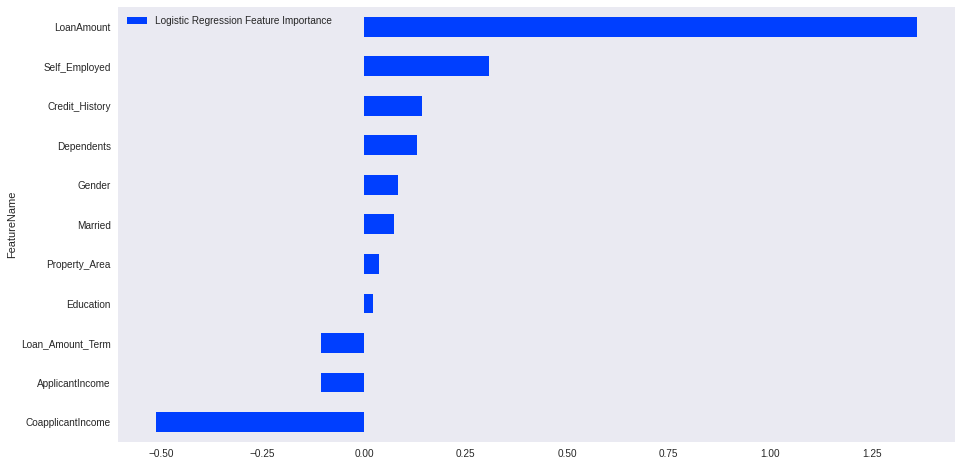

In [ ]:
features_importances_lr.sort_values("Logistic Regression Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Logistic Regression Feature Importance"], kind="barh")

In [ ]:
# ROC curve

y_pred_prob_test = LR_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

ValueError: ignored

In [ ]:
print('AUC score: ', roc_auc_score(y_test, y_pred))

AUC score:  0.6544715447154472
